# 1. Import Libraries

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Import the Dataset

In [14]:
try:
    df = pd.read_csv('Dataset/cleaned_dataset.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

In [15]:
df.head()

,ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_of_Min_Amount,Total_EMI_per_month,Occupation_Encoded,Monthly_Inhand_Salary_Winsorized,Credit_Mix_Encoded,Outstanding_Debt_Winsorized,Amount_Invested_Monthly_Clean,Payment_Behaviour_Encoded,Monthly_Balance_Cleaned,Credit_Score_Encoded
0,0,19114.12,3,4,3,4,3,7,11.27,4.0,...,1,49.574949,13,1824.843333,1,809.98,80,2,312.0,2
1,1,19114.12,3,4,3,4,-1,0,11.27,4.0,...,1,49.574949,13,3093.745000,2,809.98,118,3,284.0,2
2,2,19114.12,3,4,3,4,3,7,9.25,4.0,...,1,49.574949,13,3093.745000,2,809.98,81,4,331.0,2
3,3,19114.12,3,4,3,4,5,4,6.27,4.0,...,1,49.574949,13,3093.745000,2,809.98,199,5,223.0,2
4,4,19114.12,3,4,3,4,6,0,11.27,4.0,...,1,49.574949,13,1824.843333,2,809.98,41,1,341.0,2


# 3. Make Model using simple Decision Tree

Validation Accuracy: 0.7715

Validation Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.76      0.77      0.77      5799
    Standard       0.80      0.79      0.79     10635
        Good       0.71      0.71      0.71      3566

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000

Test Accuracy: 0.7723

Test Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.77      0.77      0.77      5800
    Standard       0.80      0.80      0.80     10635
        Good       0.71      0.70      0.70      3565

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



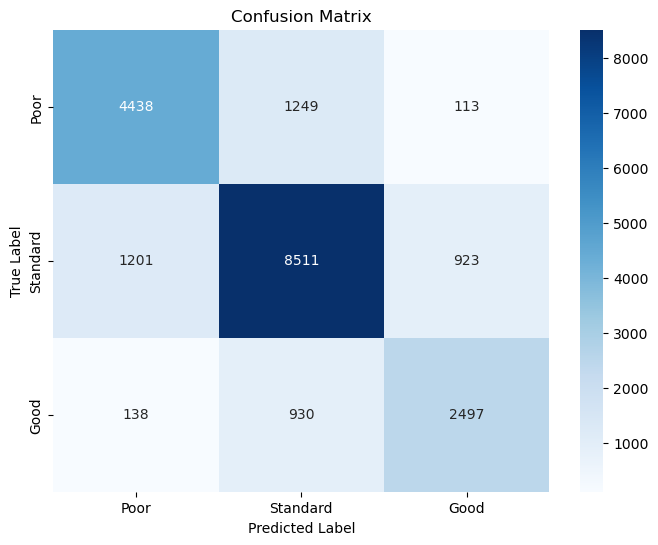

In [19]:
# Assign features and target
X, y = df.drop('Credit_Score_Encoded', axis=1), df['Credit_Score_Encoded']

# Split the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Train simple decision tree model
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Check performance for validation set
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# Evaluate on Test set
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check performance for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# Confusion matrix result
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Make Model using simple Decision Tree

Training set: 60000 samples
Validation set: 20000 samples
Test set: 20000 samples
Validation Accuracy: 0.8266

Validation Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.83      0.82      0.82      5799
    Standard       0.83      0.86      0.84     10635
        Good       0.81      0.75      0.78      3566

    accuracy                           0.83     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.83      0.83      0.83     20000

Test Accuracy: 0.8283

Test Set Classification Report:
              precision    recall  f1-score   support

        Poor       0.83      0.83      0.83      5800
    Standard       0.83      0.86      0.85     10635
        Good       0.81      0.73      0.77      3565

    accuracy                           0.83     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.83      0.83      0.83     20000



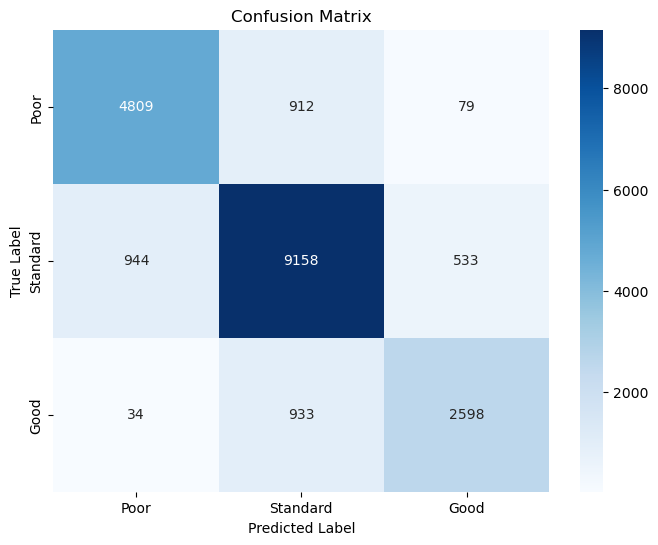

In [16]:
# Assign features and target
X, y = df.drop('Credit_Score_Encoded', axis=1), df['Credit_Score_Encoded']

# Split the data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Initialize and train the model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Important for imbalanced classes
)

model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Check performance by class
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# If satisfied with validation performance, evaluate on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, 
                           target_names=['Poor', 'Standard', 'Good']))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Standard', 'Good'],
            yticklabels=['Poor', 'Standard', 'Good'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()